In [ ]:
#A. Data import + cleaning

In [15]:
import pandas as pd

util_url = "https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/util_b_emp.csv"   # e.g. util_b_emp.csv
util = pd.read_csv(util_url)

weights_url = "https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/survey_emp.csv"  # e.g. emp_imp.csv
weights = pd.read_csv(weights_url)

computers_url = "https://raw.githubusercontent.com/shubhamkalra27/dsep-2020/main/datasets/vendor_options.csv"  # e.g. comp_specs.csv
computers = pd.read_csv(computers_url)

print("\nUTILIZATION DATA:")
print(util.head())

print("\nIMPORTANCE WEIGHTS:")
print(weights.head())

print("\nCOMPUTER SPECIFICATIONS:")
print(computers.head())


UTILIZATION DATA:
   employee_id utilization_bin
0         1743            high
1         1752            high
2         1758            high
3         1825            high
4         1842            high

IMPORTANCE WEIGHTS:
   employee_id  memory  processing  storage  inverse_price
0         1743   0.375       0.225    0.150           0.25
1         1752   0.450       0.225    0.075           0.25
2         1758   0.375       0.300    0.075           0.25
3         1825   0.300       0.300    0.150           0.25
4         1842   0.300       0.300    0.150           0.25

COMPUTER SPECIFICATIONS:
   computer_id  memory  processing  storage  inverse_price
0           13       5           7       10            2.7
1           16       9           8        9            1.3
2            4       8           9       10            1.0
3            1       8           8        9            1.7
4            3       5           4        4            5.7


In [42]:
#B. Segmentation logic

In [27]:
#Merge usage bin and importance weights

df = util.merge(weights, on="employee_id")
df.head()

,employee_id,utilization_bin,memory,processing,storage,inverse_price
0,1743,high,0.375,0.225,0.150,0.25
1,1752,high,0.450,0.225,0.075,0.25
2,1758,high,0.375,0.300,0.075,0.25
3,1825,high,0.300,0.300,0.150,0.25
4,1842,high,0.300,0.300,0.150,0.25


In [ ]:
#C. Computation of average weights per segment

In [29]:
avg_weights = df.groupby("utilization_bin")[["memory", "processing", "storage", "inverse_price"]].mean()
print(avg_weights)

                   memory  processing   storage  inverse_price
utilization_bin                                               
high             0.378750    0.260625  0.110625           0.25
low              0.195000    0.150000  0.405000           0.25
medium           0.185756    0.339244  0.225000           0.25


In [ ]:
#D. Scoring function

In [31]:
def score_computer(computer, weights):
    return (
        computer['memory'] * weights['memory'] +
        computer['processing'] * weights['processing'] +
        computer['storage'] * weights['storage'] +
        computer['inverse_price'] * weights['inverse_price']
    )
    
results = {}

# Apply scoring for each usage group
for usage in avg_weights.index:
    w = avg_weights.loc[usage]
    results[usage] = computers.apply(lambda row: score_computer(row, w), axis=1)

In [ ]:
#F. Visualizations

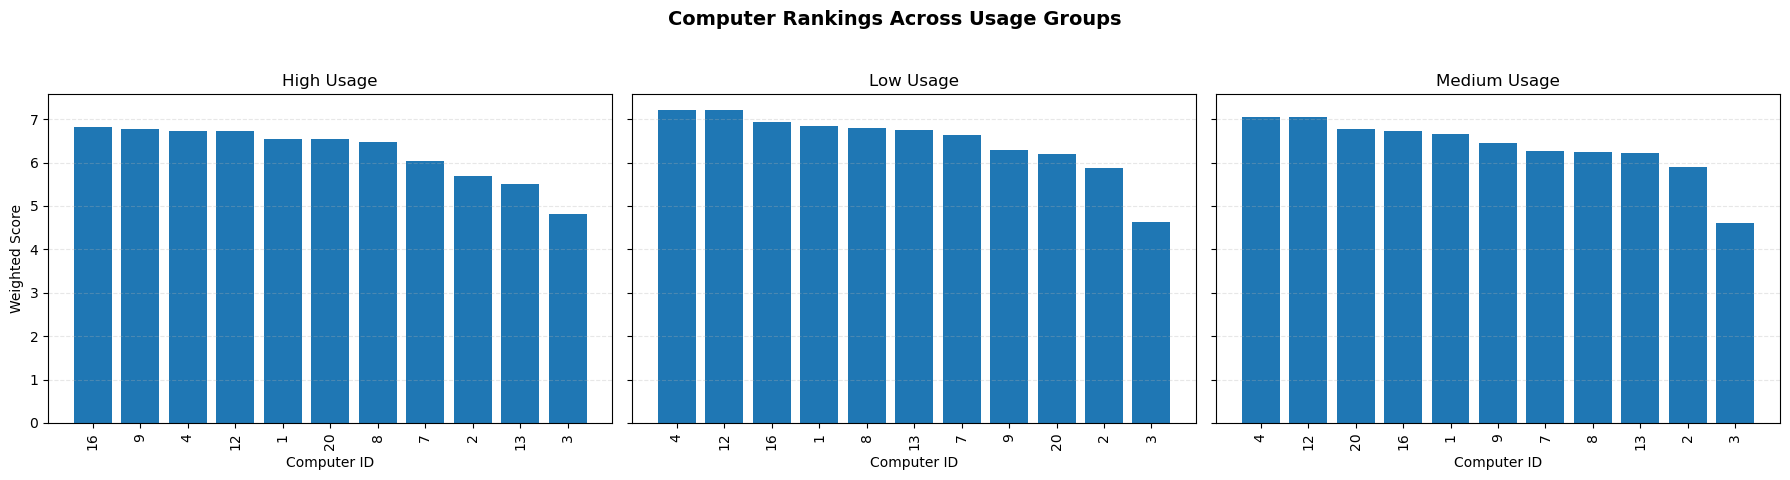

In [53]:
import matplotlib.pyplot as plt

# Convert results dictionary → DataFrame
score_df = pd.DataFrame(results)
score_df['computer_id'] = computers['computer_id']
score_df = score_df.set_index('computer_id')

usage_groups = score_df.columns  # e.g. ['high', 'low', 'medium']

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for ax, usage in zip(axes, usage_groups):
    # Sort descending by score
    data = score_df[usage].sort_values(ascending=False)
    
    # Create bar chart
    bars = ax.bar(range(len(data)), data.values)

    # Set tick positions **before** setting labels
    ax.set_xticks(range(len(data)))
    ax.set_xticklabels(data.index.astype(str), rotation=90)

    ax.set_title(f"{usage.capitalize()} Usage", fontsize=12)
    ax.set_xlabel("Computer ID")
    ax.grid(axis='y', linestyle='--', alpha=0.3)

axes[0].set_ylabel("Weighted Score")

plt.suptitle("Computer Rankings Across Usage Groups", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
